# Preprocessing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
from sklearn.model_selection import train_test_split
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

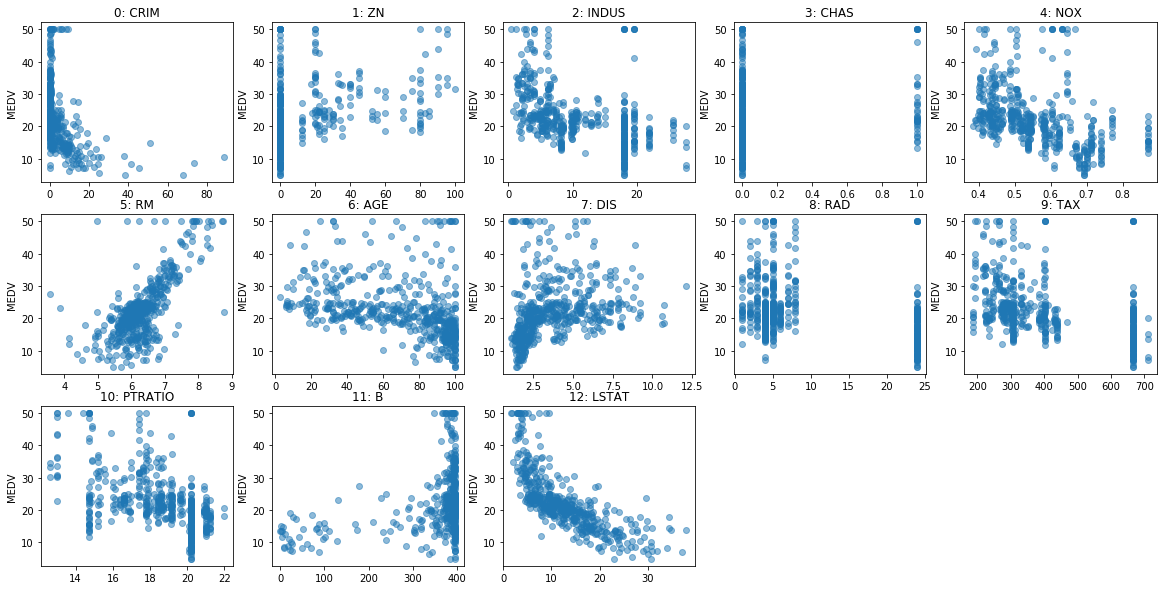

In [5]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

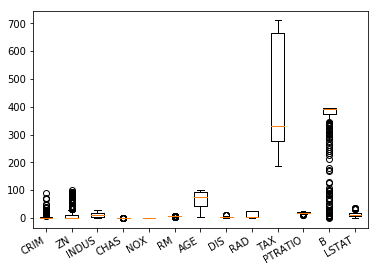

In [6]:
plt.boxplot(X)
plt.xticks(np.arange(1, X.shape[1] + 1),
           boston.feature_names, rotation=30, ha="right");

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [8]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor().fit(X_train, y_train)
knr.score(X_train, y_train)

0.7066272660046313

In [9]:
knr.score(X_test, y_test)

0.4616380924610112

In [10]:
knr_scaled = KNeighborsRegressor().fit(X_train_scaled, y_train)
knr_scaled.fit(X_train_scaled, y_train)
knr_scaled.score(X_train_scaled, y_train)

0.849576948978109

In [11]:
X_test_scaled = scaler.transform(X_test)
knr_scaled.score(X_test_scaled, y_test)

0.606952770711171

In [12]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7951320840066728

In [13]:
rf_scaled = RandomForestRegressor(n_estimators=100, random_state=0)
rf_scaled.fit(X_train_scaled, y_train)
rf_scaled.score(X_test_scaled, y_test)

0.7954056384168993

# Categorical Variables

In [14]:
import pandas as pd
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx']})
df

,salary,boro
0,103,Manhattan
1,89,Queens
2,142,Manhattan
3,54,Brooklyn
4,63,Brooklyn
5,219,Bronx


In [15]:
pd.get_dummies(df)

,salary,boro_Bronx,boro_Brooklyn,boro_Manhattan,boro_Queens
0,103,0,0,1,0
1,89,0,0,0,1
2,142,0,0,1,0
3,54,0,1,0,0
4,63,0,1,0,0
5,219,1,0,0,0


In [16]:
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
categorical = df.dtypes == object
ct = make_column_transformer((categorical, OneHotEncoder()),
                             (~categorical, StandardScaler()))
ct.fit_transform(df)

/Users/lgaalves/miniconda3/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:732: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)
/Users/lgaalves/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lgaalves/miniconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.        ,  0.        ,  1.        ,  0.        , -0.15514441],
       [ 0.        ,  0.        ,  0.        ,  1.        , -0.4057623 ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.54300544],
       [ 0.        ,  1.        ,  0.        ,  0.        , -1.03230704],
       [ 0.        ,  1.        ,  0.        ,  0.        , -0.87119554],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  1.92140385]])

# Exercises

## Exercise 1
Load the "adult" datasets consisting of income data from the census, classifying adults into those earning above ``$50k`` a year vs those earning below.

## Exercise 2
Experiment with visualizing the data. Can you find out which features influence the income the most?

## Exercise 3
Separate the target variable from the features.
Split the data into training and test set.
Apply dummy encoding and scaling.
How did this change the number of variables?

## Exercise 4
Build and evaluate a LogisticRegression model on the data.



In [17]:
data = pd.read_csv("data/adult.csv", index_col=0)

In [18]:
load solutions/load_adult.py